In [14]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(readr)
library(forcats)
library(reshape2)
library("dplyr")
library("foreign")
library("data.table")
library("car")
library(semPlot)
library(lavaan)
library(factoextra)

In [15]:
data <- read_csv("cleanest_of_datas.csv", show_col_types = FALSE)
categorical_columns <- c(
  "Gender", "Industry", "FamilyStatus",
  "Location",  "ManagingRole"
)
numeric_columns <- c(
  "Age","Experience", "Commuting", "WorkEfficiency", "Housework", "FamilyTime",
  "RemoteWorkExtent", "RemoteWorkSupport", "Productivity",
  "InterpersonalRelationships", "SocialIsolation", "Sleep",
  "EconomicResources", "RemoteWorkCompatability", "Motivation",
  "PhysicalEnvironment", "Wellbeing", "MentalHealth", "PhysicalHealth",
  "Sociability"
)

In [16]:
# scree.plot(data[numeric_columns])

In [17]:
library("psych")
library("psy")
library("tidyverse") 

correlation_matrix <- cor(data[numeric_columns], use = "complete.obs")

data <- na.omit(data)


pr_ititial <- principal(correlation_matrix,
    nfactors = 7,
    rotate = "varimax"
)
# h2 - communalities
print(pr_ititial$Structure, digits=3, cutoff = 0.4, sort = T)


Loadings:
                           RC1    RC2    RC7    RC5    RC3    RC4    RC6   
SocialIsolation             0.767                                          
EconomicResources           0.727                                          
RemoteWorkCompatability     0.726                                          
Motivation                  0.753                                          
PhysicalEnvironment         0.801                                          
Wellbeing                   0.782                                          
Productivity                       0.710                                   
MentalHealth                       0.812                                   
PhysicalHealth                     0.790                                   
RemoteWorkExtent                          0.804                            
RemoteWorkSupport                         0.854                            
Commuting                                        0.926                     
W

In [ ]:
library(lavaan)

model <- '
  RemoteWorkChallenges =~ RemoteWorkCompatability + Motivation + WorkEfficiency 
  WorkOutcomes =~  MentalHealth + PhysicalHealth 
  RemoteWorkOrganization =~ RemoteWorkExtent + RemoteWorkSupport + RemoteWorkCompatability 
  WorkLifeBalance =~ Commuting + FamilyTime + RemoteWorkExtent +  Motivation 
  FamilyStage =~ Age + Commuting + WorkEfficiency + FamilyTime 
  PerformanceEfficiency =~ WorkEfficiency + FamilyTime + Motivation
  HolisticResources =~ MentalHealth + PhysicalEnvironment 

  # Structural Model
  # Direct Effects
  MentalHealth ~ RemoteWorkChallenges + WorkLifeBalance + PerformanceEfficiency  
  
  # Indirect Effects (optional)
  WorkOutcomes ~ RemoteWorkChallenges + RemoteWorkOrganization + WorkLifeBalance + HolisticResources + FamilyStage
  
  # Covariances
  WorkOutcomes ~~ RemoteWorkChallenges
  PerformanceEfficiency ~~ WorkLifeBalance
  RemoteWorkChallenges ~~ Commuting
'

fit <- sem(model, data = data[numeric_columns])

chisq_value <- fitMeasures(fit, "chisq")
df <- fitMeasures(fit, "df")
p_value <- fitMeasures(fit, "pvalue")

# Print the results
cat("Chi-square value:", chisq_value, "\n")
cat("Degrees of freedom:", df, "\n")
cat("P-value:", p_value, "\n")

summary(fit, fit.measures = TRUE)

varTable(fit)

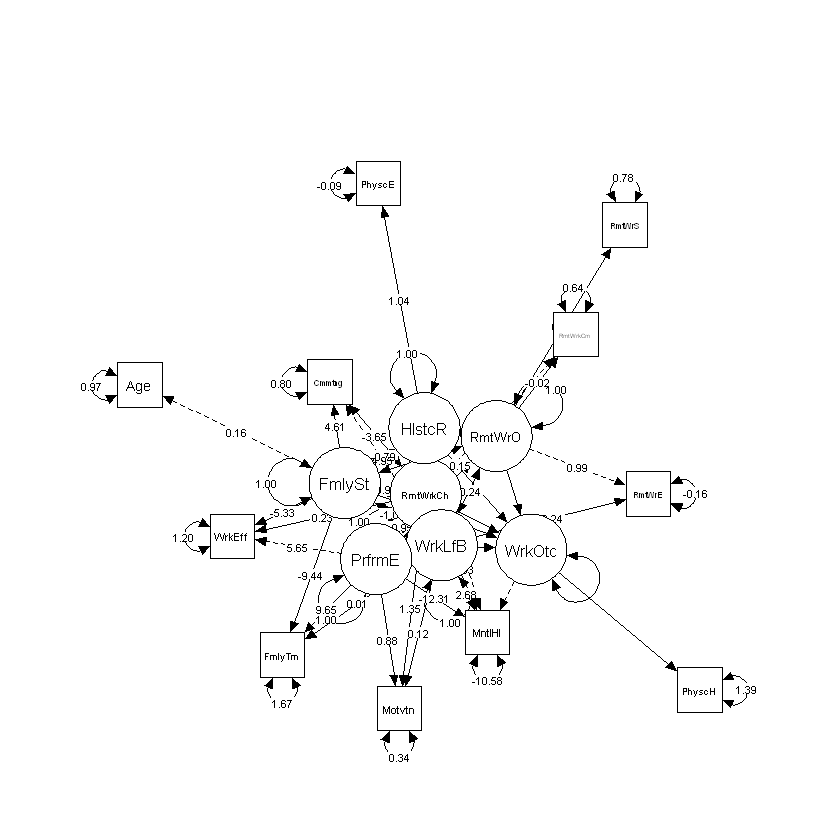

In [19]:
library(semPlot)

semPaths(fit, whatLabels = "std", layout = "spring", edge.color = "black", 
         title = TRUE, nCharNodes = 6)